In [36]:
import pylheV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
#This function calculates the invariant mass of a photon pair.
def massa_invariante(p1,p2, num_eventos):
    
    massa_invariante = []
    
    for i in range(num_eventos):
        mI = 0
        for j in range(4):
            if j == 0:
                tensor = 1
            else:
                tensor = -1
            mI = mI + tensor*((p1[i][j]+p2[i][j])**2)
        massa_invariante.append(np.sqrt(mI))
        

    
    return massa_invariante

In [3]:
#This function calculates the invariant mass of the process p p > h > a a, applying the cuts.
def massa_invarianteH(p1,p2, num_eventos, eta1, eta2, p_T1, p_T2):

    
    massa_invariante = []
    
    for i in range(num_eventos):
        mI = 0
        for j in range(4):
            if j == 0:
                tensor = 1
            else:
                tensor = -1
            mI = mI + tensor*((p1[i][j]+p2[i][j])**2)
        if abs(eta1[i]) <= 2.5 and abs(eta2[i]) <= 2.5 and p_T1[i] >= 25 and p_T2[i] >= 25:
            massa_invariante.append(np.sqrt(mI))
        

    
    return massa_invariante

In [4]:
#This function reads the 4-momentum in the .lhe file
def leitor_quadrimomento(file_name):
    p1 = []
    p2 = []

    #This file was generated using the cards.
    num_eventos = pylheV.readNumEvents(file_name)


    for e in pylheV.readLHE(file_name):
        quadrimomento1 = []
        quadrimomento2 = []
        for mu in ['e','px','py','pz']:
            quadrimomento1.append(getattr(e.particles[-1],mu))
            quadrimomento2.append(getattr(e.particles[-2],mu))
        p1.append(quadrimomento1)
        p2.append(quadrimomento2)

    return p1,p2,num_eventos


In [5]:
#This function calculates the pseudorapidity of a photon.
def pseudorapidity(file_name):
   
    eta1 = []
    eta2 = []
    for e in pylheV.readLHE(file_name):
        eta1.append(e.particles[-1].pseudorapidity())
        eta2.append(e.particles[-2].pseudorapidity())

    return eta1, eta2

In [6]:
#This function calculates the transverse momentum of a photon.
def pT(file_name):
   
    p_T1 = []
    p_T2 = []
    for e in pylheV.readLHE(file_name):
        p_T1.append(e.particles[-1].pT())
        p_T2.append(e.particles[-2].pT())

    return p_T1, p_T2

In [7]:
#invariant mass for p p > a a (sqrt(s) = 7 TeV), cross_section = 2.258 pb
p1,p2,num_eventos = leitor_quadrimomento('pp2aa_7TeV.lhe')
m_aa_1 = massa_invariante(p1,p2,num_eventos)

#invariant mass for p p > a a without higgs (sqrt(s) = 7 TeV), cross_section = 2.251 pb
p1,p2,num_eventos = leitor_quadrimomento('pp2aa_nH_7TeV.lhe')
m_aa_nH_1 = massa_invariante(p1,p2,num_eventos)

#Invariant mass for p p > h > a a (sqrt(s) = 7 TeV), cross section = 0.008509 pb
p1h,p2h,num_eventosh = leitor_quadrimomento('pp2h2aa_7TeV.lhe')
eta1, eta2 = pseudorapidity('pp2h2aa_7TeV.lhe')
p_T1, p_T2 = pT('pp2h2aa_7TeV.lhe')
m_h_aa_1 = massa_invarianteH(p1h,p2h,num_eventosh, eta1, eta2, p_T1, p_T2)

#Invariant mass for p p > a a (sqrt(s) = 8 TeV), cross section =  2.503 pb
p1_8,p2_8,num_eventos_8 = leitor_quadrimomento('pp2aa_8TeV.lhe')
m_aa_2 = massa_invariante(p1_8,p2_8,num_eventos_8)

#invariant mass for p p > a a without higgs (sqrt(s) = 8 TeV), cross_section = 2.495 pb
p1,p2,num_eventos = leitor_quadrimomento('pp2aa_nH_8TeV.lhe')
m_aa_nH_2 = massa_invariante(p1,p2,num_eventos)

#Invariant mass for p p > h > a a (sqrt(s) = 8TeV), cross section = 0.01097 pb
p1h_8,p2h_8,num_eventosh_8 = leitor_quadrimomento('pp2h2aa_8TeV.lhe')
eta1, eta2 = pseudorapidity('pp2h2aa_8TeV.lhe')
p_T1, p_T2 = pT('pp2h2aa_8TeV.lhe')
m_h_aa_2 = massa_invarianteH(p1h_8,p2h_8,num_eventosh_8, eta1, eta2, p_T1, p_T2)
    

In [8]:
#putting the data together
m_aa = []
m_aa_nH = []
m_h_aa = []


for i in range(200000):
    m_aa.append(m_aa_1[i])
    
for i in range(200000):
    m_aa_nH.append(m_aa_nH_1[i])

for i in range(len(m_h_aa_1)):
    m_h_aa.append(m_h_aa_1[i])
    

for i in range(200000):
    m_aa.append(m_aa_2[i])
    
for i in range(200000):
    m_aa_nH.append(m_aa_nH_2[i])

for i in range(len(m_h_aa_2)):
    m_h_aa.append(m_h_aa_2[i])
    
#Setting the weights:

weight_aa = (200000)*[2258/200000]
weight_aa = weight_aa + (200000)*[2503/200000]

weight_aa_nH = (200000)*[2251/200000]
weight_aa_nH = weight_aa_nH + (200000)*[2495/200000]
    
weight_h_aa = (len(m_h_aa_1))*[8.509/200000]
weight_h_aa = weight_h_aa + (len(m_h_aa_2))*[10.97/200000]


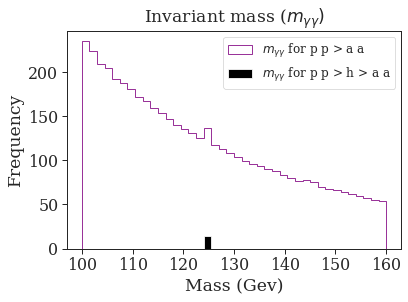

In [37]:
#Ploting the invariant mass 

histogram = plt.hist(m_aa, bins = 40, color = 'purple', range = (100,160),weights = weight_aa, histtype = 'step',label = r'$m_{\gamma\gamma}$ for p p > a a')


histogram1 = plt.hist(m_h_aa, bins = 40, color = 'black', range = (100,160), weights = weight_h_aa, label = r'$m_{\gamma\gamma}$ for p p > h > a a')


plt.title(r'Invariant mass ($m_{\gamma\gamma})$')
plt.xlabel('Mass (Gev)')
plt.ylabel('Frequency')
plt.legend(fontsize = 12)
plt.savefig('Massa_invariante1.pdf')
plt.show()

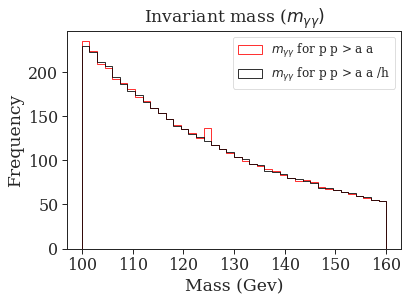

In [38]:
#Plotando o histograma

histogram = plt.hist(m_aa, bins = 40, color = 'red', range = (100,160),weights = weight_aa, histtype = 'step', label = r'$m_{\gamma\gamma}$ for p p > a a')

histogram1 = plt.hist(m_aa_nH, bins = 40, color = 'black', range = (100,160), weights = weight_aa_nH, histtype = 'step', label = r'$m_{\gamma\gamma}$ for p p > a a /h')

plt.title(r'Invariant mass ($m_{\gamma\gamma})$')
plt.xlabel('Mass (Gev)')
plt.ylabel('Frequency')
plt.legend(fontsize = 12)
plt.savefig('Massa_invariante.pdf')
plt.show()

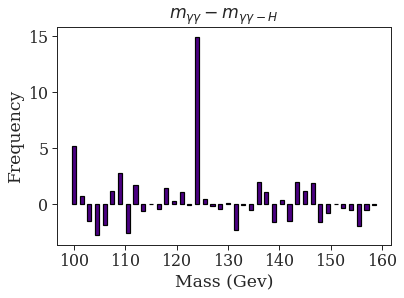

In [45]:
#Histogram with the difference in the simulations p p > a a and p p > a a /h

#Left limits of the bins:

a =[]
for i in range(40):
    a.append(100+i*1.5)
    
diff=plt.bar( a,
             height=(histogram[0]-histogram1[0]), edgecolor='black',
             linewidth=1.2, color='indigo')
plt.title(r'$m_{\gamma\gamma} - m_{\gamma\gamma-H}$')
plt.xlabel('Mass (Gev)')
plt.ylabel('Frequency')
plt.savefig('IM_difference.pdf')
plt.show()

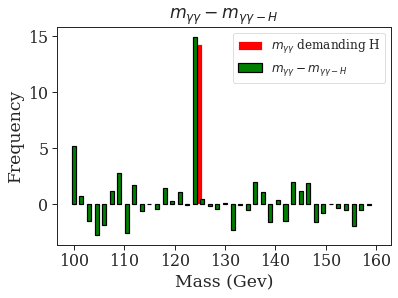

In [44]:
#Histogram with the simulation demmanding higg with the difference the difference in the simulations p p > a a and p p > a a /h 
histogram2 = plt.hist(m_h_aa, bins = 40, color = 'red', range = (100,160),weights = weight_h_aa, label = r'$m_{\gamma\gamma}$ demanding H')

#Left limits of the bins:

a =[]
for i in range(40):
    a.append(100+i*1.5)
    
diff=plt.bar( a,
             height=(histogram[0]-histogram1[0]), edgecolor='black',
             linewidth=1.2, color='green', label = r'$m_{\gamma\gamma} - m_{\gamma\gamma-H}$')
plt.title(r'$m_{\gamma\gamma} - m_{\gamma\gamma-H}$')
plt.xlabel('Mass (Gev)')
plt.ylabel('Frequency')
plt.legend(fontsize = 12)
plt.savefig('IM_difference_withH.pdf')
plt.show()